In [2]:
# !pip install opencv-python
# !pip install numpy
# !pip install matplotlib
# !pip install tensorflow
# !pip show tensorflow

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class CardAlignment:
    def __init__(self, visualization=False):
        self.visualization_mode = visualization

    def crop_card(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        max_contour = max(contours, key=cv2.contourArea)
        rect = cv2.minAreaRect(max_contour)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        card = image.copy()
        cv2.drawContours(card, [box], 0, (0, 255, 0), 2)
        (x, y, w, h) = cv2.boundingRect(box)
        card = card[y:y+h, x:x+w]
        return card, rect

    def align_card(self, card, rect_angle):
       height, width = card.shape[:2]
       if rect_angle < -45:
         rect_angle += 90
       elif rect_angle > 45:
         rect_angle -= 90
       rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rect_angle, 1)
       aligned_card = cv2.warpAffine(card, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)
       return aligned_card

In [5]:
def process_image(image):
    card_aligner = CardAlignment(visualization=True)
    card, rect = card_aligner.crop_card(image)
    rect_angle = rect[-1]
    aligned_card = card_aligner.align_card(card, rect_angle)

    # Check if additional cropping is required
    gray_aligned = cv2.cvtColor(aligned_card, cv2.COLOR_BGR2GRAY)
    _, thresh_aligned = cv2.threshold(gray_aligned, 1, 255, cv2.THRESH_BINARY)
    contours_aligned, _ = cv2.findContours(thresh_aligned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour_aligned = max(contours_aligned, key=cv2.contourArea)
    rect_aligned = cv2.minAreaRect(max_contour_aligned)
    box_aligned = cv2.boxPoints(rect_aligned)
    box_aligned = np.intp(box_aligned)

    # Calculate bounding box
    (x, y, w, h) = cv2.boundingRect(box_aligned)

    # Apply additional cropping if required
    if x > 0 or y > 0 or x + w < aligned_card.shape[1] or y + h < aligned_card.shape[0]:
        aligned_card = aligned_card[y:y+h, x:x+w]

    return aligned_card


In [6]:
# Path to the image file
original_image = cv2.imread(r"input_output\captured_frame_.png")
# Process the image
aligned_image = process_image(original_image)
aligned_image1 = process_image(aligned_image)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

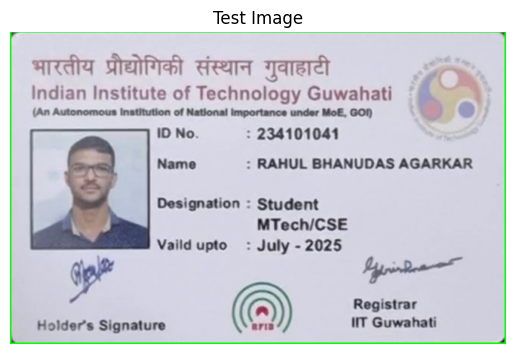

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
The predicted class of the image is: Valid ID Card


In [8]:


# Load the saved model
# model = tf.keras.models.load_model(r"C:\Users\Ritik\OneDrive\Desktop\Entery_Exit_System_IITG\Classification_model\my_model.keras")
model = tf.keras.models.load_model(r"E:\IPML\Classification_model\my_model.keras")

# Define a function to predict the class of an image
def predict_image_class(img_array):
    # Resize the image to match the input size of the model (assuming 150x150 here)
    img = cv2.resize(img_array, (150, 150))
    img_array = np.expand_dims(img, axis=0) / 255.0  # Normalize and add batch dimension

    predictions = model.predict(img_array)
    if predictions[0] > 0.5:
        return 'Valid ID Card'
    else:
        return 'Invalid ID Card'

# Load and preprocess the test image
# file_path = 'E:\\Entery_Exit_System_IITG\\images\\rahul_2.png'
# img = cv2.imread(file_path)  # Load the image using OpenCV
img= aligned_image1.copy()
if img is not None:
    # Display the test image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title('Test Image')
    plt.axis('off')
    plt.show()

    # Predict the class of the test image
    predicted_class = predict_image_class(aligned_image1)

    # Display the predicted class
    print(f"The predicted class of the image is: {predicted_class}")
else:
    print("Error: Unable to load image ")


In [9]:
# pip install pytesseract
# pip install pandas
# pip install openpyxl

In [10]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\\Users\\Ritik\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe"

In [11]:
import pytesseract
import pandas as pd
import re
import datetime
import pytz

In [12]:
# Read the image
img = aligned_image1.copy()
roll_no = img.copy()
img_copy = img.copy()

( Can add some image enhancement ! image RESIZE )

In [13]:
# Get image dimensions
height, width, _ = img.shape
# # Draw the rectangle on the image
green_color = (0, 255, 0)  # Green color in BGR
border_thickness = 2  # Thickness of the border

In [14]:
# Calculate the coordinates for the rectangle
top_left = (int(width * (.1/70)), int(height * (1/4)))
bottom_right = (int(width * (1/3.2)), int(height * (3/4)))

# Define shrinkage percentages
shrink_percentage = 0.06

# Calculate the shrinkage amount
shrink_x = int((bottom_right[0] - top_left[0]) * shrink_percentage)
shrink_y = int((bottom_right[1] - top_left[1]) * shrink_percentage)

# Adjust the coordinates to shrink the rectangle
top_left = (top_left[0] + shrink_x, top_left[1] + shrink_y)
bottom_right = (bottom_right[0] - shrink_x, bottom_right[1] - shrink_y)

In [15]:
cv2.rectangle(img_copy, top_left, bottom_right, green_color, border_thickness)
# Convert BGR image to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)


In [16]:
# Crop the selected part from the original image
cropped_img = img_rgb[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

In [17]:
# Specify the file path where you want to save the cropped image
cropped_image_path = "E:\IPML\input_output\cropped_image.jpg"

# Save the cropped image
cv2.imwrite(cropped_image_path, cropped_img)

# Display the path to the cropped image
print("Cropped image saved at:", cropped_image_path)

Cropped image saved at: E:\IPML\input_output\cropped_image.jpg


In [18]:
import face_recognition
# # Initialize lists to store known face encodings and names
known_face_encodings = []
known_face_names = []

# Load the known image
known_image = face_recognition.load_image_file(cropped_image_path)

# Encode the face in the known image
face_encoding = face_recognition.face_encodings(known_image)[0]

# Append the face encoding and name to the lists
known_face_encodings.append(face_encoding)



In [19]:
# Load the query image
query_image = face_recognition.load_image_file(r"E:\IPML\input_output\cropped_image.jpg") ###LIVE
query_face_encoding = face_recognition.face_encodings(query_image)[0]

# Compare encodings with known faces
for known_face_encoding, known_face_name in zip(known_face_encodings, known_face_names):
    # Compare face encoding of query image with known face encodings
    matches = face_recognition.compare_faces([known_face_encoding], query_face_encoding)

face_distances = face_recognition.face_distance(known_face_encodings, query_face_encoding)

# Calculate matching percentage for each face encoding
matching_percentages = [(1 - distance) * 100 for distance in face_distances]

# Print or use the matching percentages
# Alternatively, find the index of the best match (smallest distance) and use its matching percentage
best_match_index = face_distances.argmin()
best_match_percentage = (1 - face_distances[best_match_index]) * 100

if(best_match_percentage > 50) :
    print("Matched")
else :
    print("Not Matching")

print(f"Match percentage: {best_match_percentage:.2f}%")
    


Matched
Match percentage: 100.00%


In [20]:
# Define the coordinates for the line rectangle
top_left_2 = (int(width * (1.94/4) ), int(height * (1.1/4)) )
bottom_right_2 = (int(width * (2.7/4)), int(height * (1.5/4)))

cv2.rectangle(roll_no, top_left_2, bottom_right_2, green_color, border_thickness)

# Convert BGR image to RGB for displaying with matplotlib
img_rgb_2 = cv2.cvtColor(roll_no, cv2.COLOR_BGR2RGB)

In [21]:
# Create a mask to cover the entire image
mask2 = np.zeros((height, width), dtype=np.uint8)

# Draw the filled rectangle on the mask
cv2.rectangle(mask2, top_left_2, bottom_right_2, (255), -1)

# Invert the mask
mask2 = cv2.bitwise_not(mask2)

# Create a white image
white_image_2 = np.ones_like(roll_no) * 255

# Combine the original image and the white image using the mask
result_2 = cv2.bitwise_or(roll_no, white_image_2, mask = mask2)


In [22]:
# Iterate over each pixel in the result image
for y in range(result_2.shape[0]):
    for x in range(result_2.shape[1]):
        # If the pixel in the result image is white
        if np.all(result_2[y, x] == [255, 255, 255]):
            # Set the corresponding pixel in the copy image to white
            roll_no[y, x] = [255, 255, 255]


(can add some Text Enhancement (Morph OP))


In [23]:
# Convert the images to grayscale
roll_no_gray = cv2.cvtColor(roll_no, cv2.COLOR_BGR2GRAY)
_, roll_no_binary = cv2.threshold(roll_no_gray, 254, 255, cv2.THRESH_BINARY)
roll_no_binary = cv2.bitwise_not(roll_no_binary)
roll_no_result = cv2.bitwise_and(roll_no, roll_no, mask=roll_no_binary)

In [24]:
# Use Tesseract to recognize text
text_1 = pytesseract.image_to_string(roll_no_result, lang="eng")
lines_1 = text_1.split("\n")


In [25]:
# Use regular expressions to find a 9-digit number
roll_no_match = re.search(r'\b\d{9}\b', lines_1[0])

# If a match is found, print the roll number
if roll_no_match:
    roll_no = roll_no_match.group(0)
else:
    print("PLEASE INSERT ID CARD PROPERLY!!")

In [26]:
# Get current system clock time in Indian Standard Time (IST)
timezone = pytz.timezone('Asia/Kolkata')  # Set timezone to IST
current_time = datetime.datetime.now(timezone).strftime("%H:%M:%S")

In [28]:
pip install openpyxl

                                              0.0/250.0 kB ? eta -:--:--
     -                                        10.2/250.0 kB ? eta -:--:--
     ------                                41.0/250.0 kB 393.8 kB/s eta 0:00:01
     ------------                          81.9/250.0 kB 657.6 kB/s eta 0:00:01
     --------------------------------       215.0/250.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import openpyxl
from datetime import datetime
import os.path
import sqlite3

In [30]:
def create_or_read_excel_sheet():
    today = datetime.now().strftime("%Y-%m-%d")
    excel_file_name = f"data_{today}.xlsx"

    if os.path.isfile(excel_file_name):
        # If file exists, open it
        wb = openpyxl.load_workbook(excel_file_name)
        sheet = wb.active
        print(f"Reading existing Excel sheet: {excel_file_name}")
    else:
        # If file doesn't exist, create a new one
        wb = openpyxl.Workbook()
        sheet = wb.active
        sheet.append(["Roll No", "Name", "Valid Upto", "Entry Time", "Branch", "Course", "Status", "Mobile Number", "Mail Id"])
        print(f"Creating new Excel sheet: {excel_file_name}")

    return wb, sheet

In [31]:
def add_data_to_sheet(sheet, roll_no, name, valid_upto, entry_time, branch, course, status, mobile_number, mail_id):
    sheet.append([roll_no, name, valid_upto, entry_time, branch, course, status, mobile_number, mail_id])

In [32]:
def get_entry_exit_status(sheet, roll_no):
    count = 0
    for row in sheet.iter_rows(values_only=True):
        if row[0] == roll_no:
            count += 1
    if count % 2 == 0:
        return "Exit"
    else:
        return "Enter"

In [33]:
def get_data_from_database(roll_no):
    conn = sqlite3.connect(r"E:\IPML\SQL_Database\Database.db")
    cursor = conn.cursor()

    # Execute SELECT query to fetch data
    select_query = f"SELECT Name, ValidUpto, Branch, Course, MailId, MobileNumber FROM Students WHERE RollNo = '{roll_no}'"
    cursor.execute(select_query)

    # Fetch the first row
    row = cursor.fetchone()
    conn.close()

    return row

In [34]:
def main():
    wb, sheet = create_or_read_excel_sheet()
    entry_time = current_time
    name = "none"
    branch = "none"
    course = "none"
    valid = "none"
    mobile_number= "none"
    mail_id= "none"
    # Fetch data from database
    db_data = get_data_from_database(roll_no)
    if db_data:
         name,valid,branch,course,mail_id, mobile_number = db_data
    else:
        print("ID DOSEN'T EXSIST IN COLLAGE DATABASE, PLEASE VISIT SECURITY DESK!!")
    status = get_entry_exit_status(sheet, roll_no)
    add_data_to_sheet(sheet, roll_no, name, valid, entry_time, branch, course, status, mobile_number, mail_id)
    # Save the workbook
    wb.save(f"data_{datetime.now().strftime('%Y-%m-%d')}.xlsx")
    print("TIMESTAMP ADDED SUCESSFULLY!!")

In [35]:
if __name__ == "__main__":
    main()

Creating new Excel sheet: data_2024-04-20.xlsx
TIMESTAMP ADDED SUCESSFULLY!!
